## **IMPORTING LIBRARIES**

In [140]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import sklearn as sk
from wordcloud import STOPWORDS
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

## **READ DATA**

In [141]:
data=pd.read_csv("/content/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df=data.copy()
dataFrame=data.copy()
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## **DATA PREPROCESSING**

In [142]:
df.drop(['show_id','director','title','duration',],inplace=True,axis=1)
data.fillna('Unknown',inplace=True)

In [143]:
year=pd.to_datetime(df['date_added'])
month=pd.to_datetime(df['date_added'])

In [144]:
df.drop(["date_added"],inplace=True,axis=1)
df2=pd.concat(objs=[year.dt.month,df],axis=1).rename(columns={'date_added':"month"})
df3=pd.concat(objs=[df2,month.dt.year],axis=1).rename(columns={"date_added":"year"})
df3.fillna('Unknown',inplace=True)
df3.head()

,month,type,cast,country,release_year,rating,listed_in,description,year
0,8.0,TV Show,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,12.0,Movie,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,12.0,Movie,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,11.0,Movie,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,1.0,Movie,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,Dramas,A brilliant group of students become card-coun...,2020.0


In [145]:
df4=df3[['cast','country','rating','listed_in','description']]
df4.head()

,cast,country,rating,listed_in,description
0,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...


In [146]:
cast_data=[]
def cast_merge(x):
    k=''
    z=x.split(',')
    for i in range(len(z)):
        z[i]=z[i].strip()
        k=k+z[i]+' '

    cast_data.append(k)


z=df4['cast'].apply(cast_merge)


In [147]:
listed_data=[]
def listed_in(x):
    k=''
    z=x.split(',')
    for i in range(len(z)):
        z[i]=z[i].strip()
        k=k+z[i]+' '

    listed_data.append(k)
z=df4['listed_in'].apply(listed_in)

In [148]:
country_data=data['country'].to_list()
description_data=data['description'].to_list()
rating_data=data['rating'].to_list()

In [149]:
merged_data=[]
for i in range(len(country_data)):
    k=''
    k=k+country_data[i]+' '+description_data[i]+" "+cast_data[i]+' '+rating_data[i]
    merged_data.append(k)

In [150]:
df4=pd.concat(objs=[data['title'],pd.DataFrame(merged_data)],axis=1).rename(columns={0:"feature"})

In [151]:
df4.head()

,title,feature
0,3%,Brazil In a future where the elite inhabit an ...
1,7:19,Mexico After a devastating earthquake hits Mex...
2,23:59,"Singapore When an army recruit is found dead, ..."
3,9,"United States In a postapocalyptic world, rag-..."
4,21,United States A brilliant group of students be...


In [152]:
cv=CountVectorizer(max_features=10000,stop_words='english')
features=cv.fit_transform(df4['feature'].values.astype('U')).toarray()
enumerated=list(enumerate(features))
df4=pd.concat(objs=[data['title'],pd.DataFrame(enumerated)],axis=1).rename(columns={1:"feature"})
df4.drop([0],axis=1,inplace=True)


## **DATASET VISUALIZATION**

**Type**

In [153]:
dataFrame[dataFrame['type']==0].count()[0]

0

In [154]:

labels = ['TV Show', 'Movie']
values = [dataFrame.type.value_counts()[1], dataFrame.type.value_counts()[0]]


fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)



**Content added over the years**

In [155]:
def year_extractor(x):
    try:
        x=x[-4:]
        return int(x)
    except:
        return np.nan

In [156]:
z=dataFrame['date_added'].to_list()
z=list(map(year_extractor,z))

<Axes: ylabel='count'>

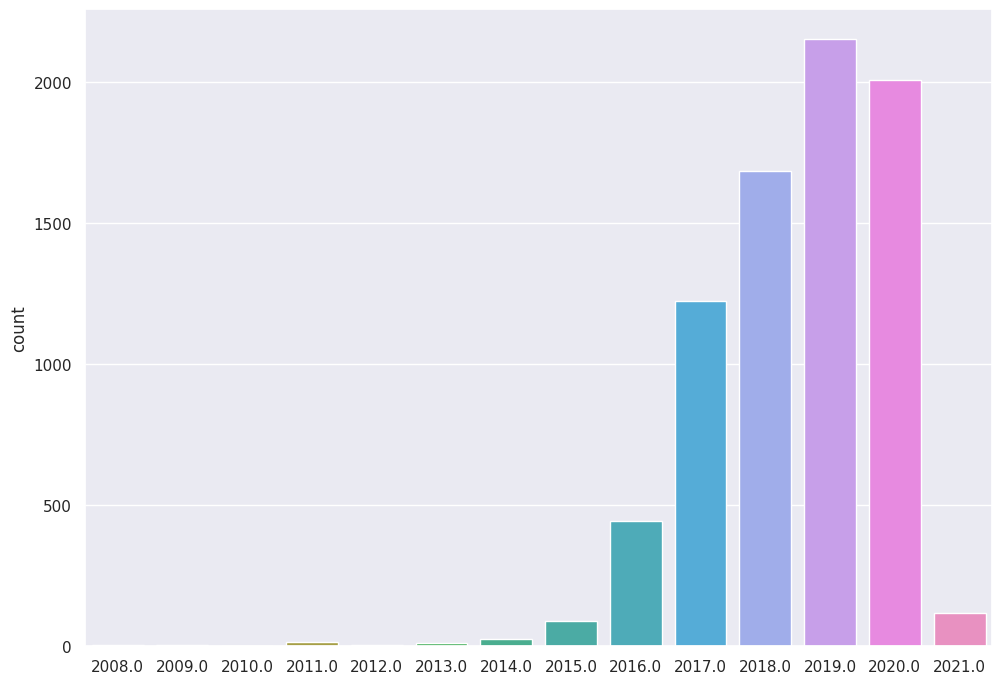

In [157]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=z)

**Most Content added according to Months**

In [158]:
def month_extractor(x):
    try:
        x=x.split()
        return x[0]
    except:
        return np.nan

In [159]:
z=dataFrame['date_added'].to_list()
z=list(map(month_extractor,z))


In [160]:
January=z.count('January')
February=z.count('February')
March=z.count('March')
April=z.count('April')
May=z.count('May')
June=z.count('June')
July=z.count('July')
August=z.count('August')
September=z.count('September')
October=z.count('October')
November=z.count('November')
December=z.count('December')
count=[January,February,March,April,May,June,July,August,September,October,November,December]
months=['January','February','March','April','May','June','July','August','September','October','November','December']

<Axes: >

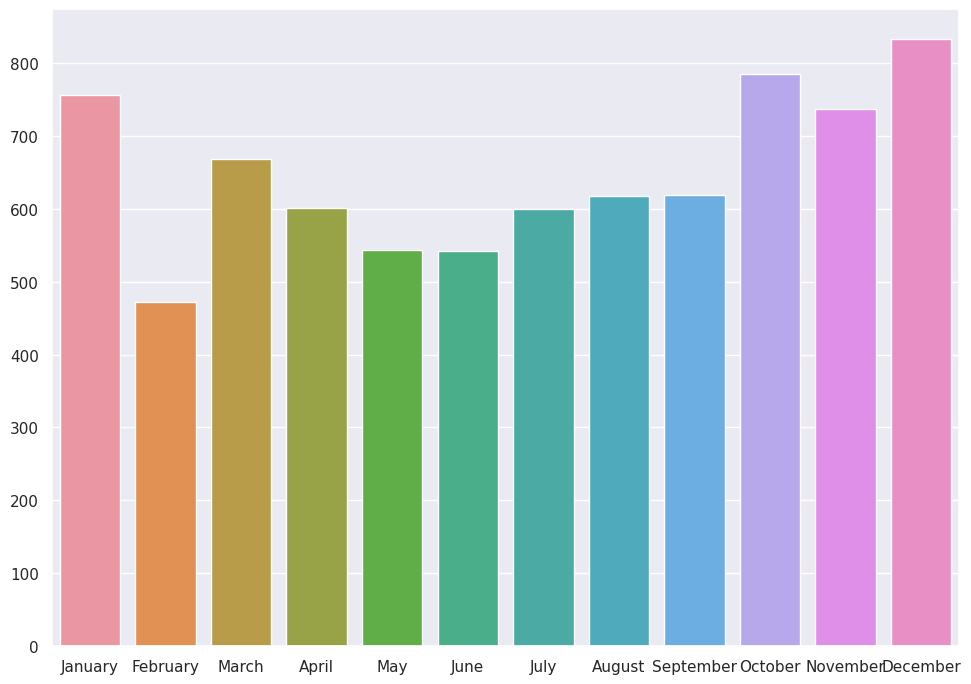

In [161]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x=months,y=count)

**POPULAR CAST**

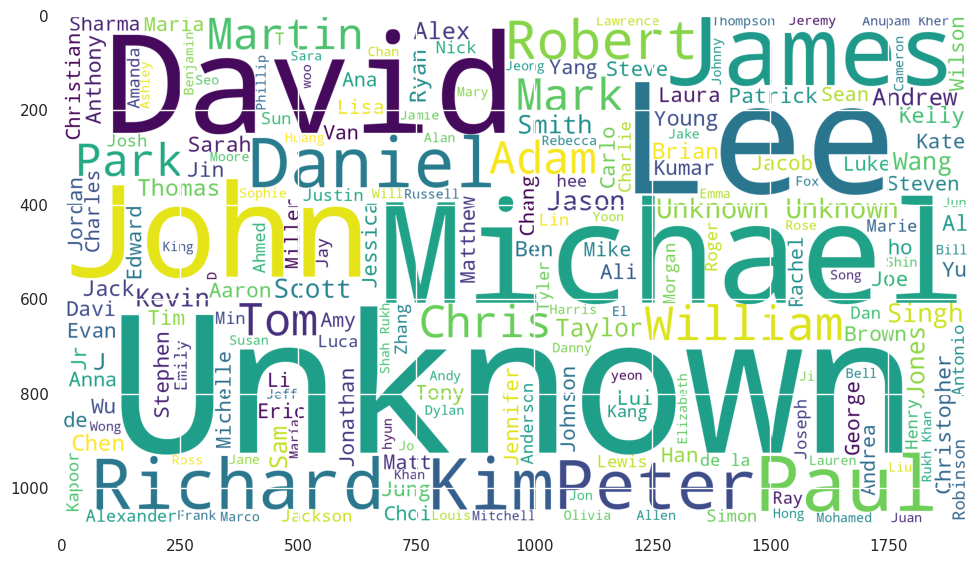

In [162]:
cast=''.join(cast_data)
cast_wordcloud=WordCloud(width=1920,height=1080,background_color='white').generate(cast)
plt.imshow(cast_wordcloud)

**POPULAR GENRES**

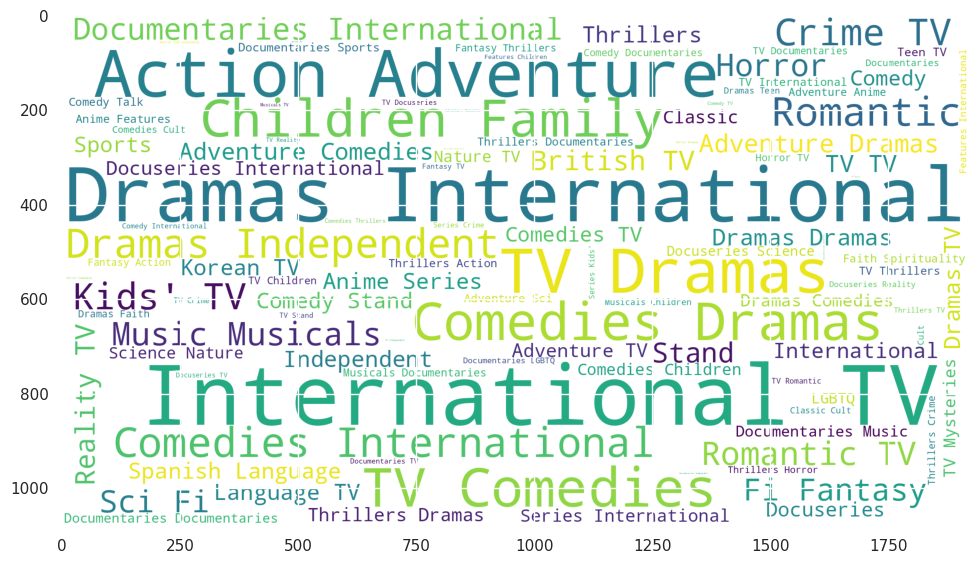

In [163]:
listed=''.join(listed_data)
stopwords=list(STOPWORDS)
stopwords.append('Movies')
stopwords.append('Shows')
list_wordcloud=WordCloud(width=1920,height=1080,background_color='white',stopwords=stopwords,).generate(listed)
plt.imshow(list_wordcloud)

**Rating**

<Axes: xlabel='rating', ylabel='count'>

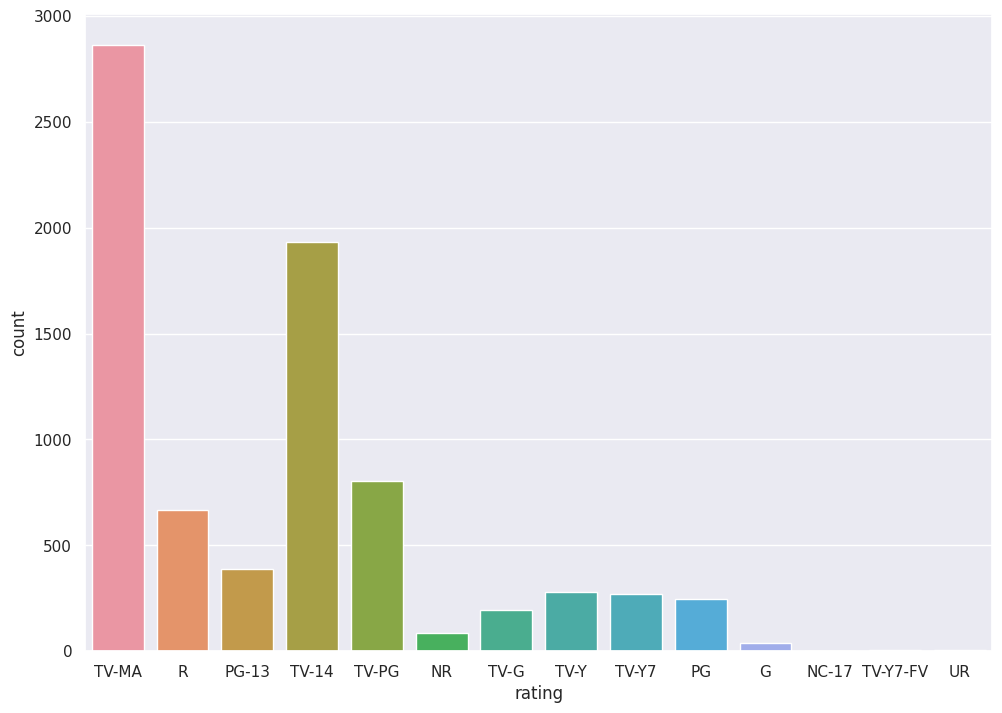

In [164]:
sns.countplot(x=dataFrame['rating'])

## **RECOMMENDATION SYSTEM USING SIMILARITY**

In [165]:
similarity=cosine_similarity(features)

def recommendation_system(movie_name):

    index=df4[df4['title']==movie_name].index[0]
    movie_smlist=similarity[index]
    z=list(enumerate(movie_smlist))
    z.sort(reverse=True,key=lambda x: x[1])
    return z[1:6]

recommended=recommendation_system("Zozo")

for i,j in recommended:
    print(df4['title'].loc[i])


Last Breath
Inside the Criminal Mind
Life Overtakes Me
Haunted
Strong Island
